### Importing useful Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pylab as plt


### Downloading NLTK data files

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading data

In [3]:
df = pd.read_csv('../Data/raw_analyst_ratings.csv')
headlines = df['headline']

### Stemming and Stop word Removing

In [4]:
# Initialize the PorterStemmer
ps = PorterStemmer()

# Define a function to clean and process the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Perform stemming
    words = [ps.stem(word) for word in words]
    
    # Rejoin the words into a single string
    processed_text = ' '.join(words)
    return processed_text

# Sentiment Analysis with TextBlob

In [5]:
# Define a function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

### Applying the Functions to the DataFrame

In [20]:
# Apply text preprocessing
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

# Apply sentiment analysis
df['sentiment'] = df['cleaned_headline'].apply(calculate_sentiment)

In [23]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,cleaned_headline
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.16,stock hit 52-week high friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.16,stock hit 52-week high wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.00,71 biggest mover friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.00,46 stock move friday' mid-day session
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.00,"b secur maintain neutral agil technologies, ra..."


In [22]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,cleaned_headline
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,-0.166667,top narrow base index august 29
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,0.500000,recap: wednesday' top percentag gainer loser
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.000000,update: oppenheim color china zenix auto initi
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.000000,"oppenheim initi china zenix outperform, $8 pt"
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX,0.000000,china zenix auto intern open trade $6.00; ipo ...


## Visualization

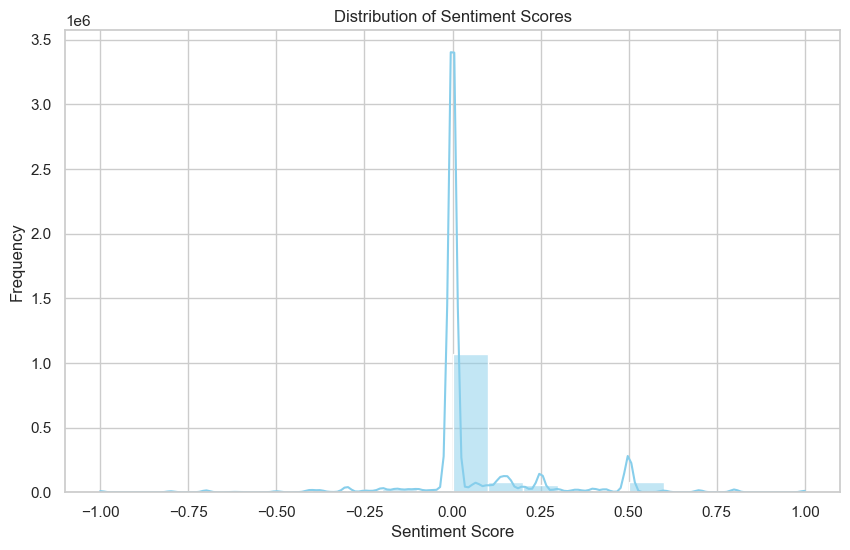

In [28]:

sns.set(style="whitegrid")

# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Sentiment Scores by Category

C:\Users\Admin\AppData\Local\Temp\ipykernel_12240\3335705107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis')


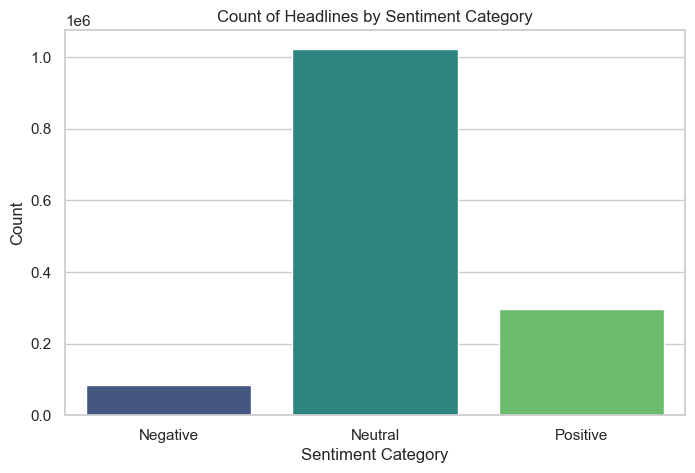

In [29]:
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Bar plot of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Count of Headlines by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()